In [1]:
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)
voc_root = os.path.join(project_root, "data", "VOC2012")

In [44]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch

from data import VOCDataset
from ssd.anchor import AnchorGenerator
from ssd.box_utils import point_form_np, intersect, jaccard

In [3]:
dataset = VOCDataset(root=voc_root)
generator = AnchorGenerator()

In [41]:
img_tensor, bboxes = dataset[0]
anchor_boxes = generator.anchor_boxes

print("Ground truth:", bboxes.shape)
for layer in anchor_boxes:
    print(f"{layer}: {anchor_boxes[layer].shape}")

Ground truth: (2, 5)
Conv4_3: (37, 37, 16)
Conv7: (18, 18, 24)
Conv8_2: (9, 9, 24)
Conv9_2: (5, 5, 24)
Conv10_2: (3, 3, 16)
Conv11_2: (1, 1, 16)


## TODO:
- Implement anchor boxes as tensors. I might as well standardize everything.
- Figure out how the math for Jaccard index works.

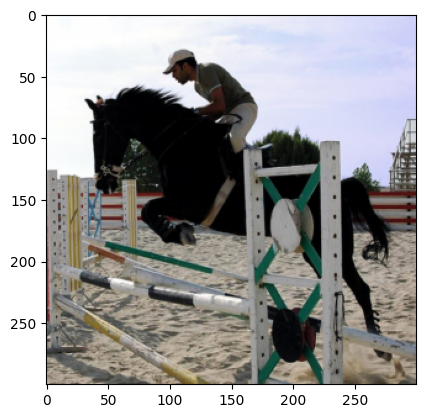

In [45]:
img = img_tensor.permute(1, 2, 0).contiguous().cpu().numpy() * 255
img = img.astype(np.uint8)
plt.imshow(img)

## Visualize Matching Boxes

In [15]:
for layer in anchor_boxes:
    


priors = point_form_np(anchor_boxes["Conv4_3"].reshape(-1, 4), clip=True)
priors.shape

(5476, 4)

In [30]:
gt_boxes = torch.Tensor(bboxes[:, :4])
priors = torch.Tensor(priors)

iou = jaccard(gt_boxes, priors)
torch.where(iou[0, :] > 0.30)

(tensor([], dtype=torch.int64),)

tensor([0.3140, 0.0973, 0.5760, 0.3756])